In [1]:
"""
The purpose of the algorithm is not to recover the original network but 
rather to identify important nodes and understand their impact on the network structure
"""
import networkx as nx
import matplotlib.pyplot as plt
import similarity as sm

### Description of **enhance_graph_by_betweenness_centrality(G)**:
Enhances a graph by reducing it based on Betweenness Centrality scores.

This function computes the Betweenness Centrality scores for all nodes in the graph `G` using the `betweenness_centrality` function from the NetworkX library.

The function then sorts the nodes in descending order based on their Betweenness Centrality scores. It sets a threshold of retaining at least 80% of the nodes (`threshold = 0.8`).

The function iterates through the sorted nodes and removes the node with the highest Betweenness Centrality score from the graph `G`. The removed node is added to the set of removed nodes.

After each removal, the function checks if the size of the largest connected component in the remaining graph, obtained by removing nodes with high Betweenness Centrality, is smaller than a certain fraction (`threshold`) of the size of the original network (`G`). If the condition is met, the loop breaks.

The function returns the reduced graph and the set of removed nodes.

### <u>Parameters</u>
**G**: NetworkX graph - The input graph.

### <u>Returns</u>
**G**: NetworkX graph - The reduced graph that includes the remaining nodes and their corresponding edges.
**removed_nodes**: set - The set of removed nodes that were not included in the reduced graph.

### <u>Notes</u>
Betweenness Centrality is a measure of the importance of a node in a network. It quantifies the number of shortest paths that pass through a node, indicating its influence in facilitating communication or flow within the network. The function relies on the NetworkX library's `betweenness_centrality` function for computing the Betweenness Centrality scores. The resulting reduced graph retains a specified fraction of the nodes, removing those with high Betweenness Centrality scores and ensuring the preservation of the largest connected component in the remaining graph.

In [2]:
""" 
Remove nodes starting with highest betweenness centrality score
A node is having High betweenness centrality means it falls in between shortest paths of 
many nodes Due to this, there can be congestion in that particular node and leads to 
bottleneck and eventually Slows down the networkin most real-world networks, there are often
multiple shortest paths between pairs of nodes, not just one. So even if we remove a node
that lies on one shortest path, there may be other paths that can still connect the same 
pair of nodes.So by removing the node we force some traffic to take alternative routes
that improves network efficiency
"""
def enhance_graph_by_betweenness_centrality(G):
    # Compute the betweenness centrality for each node
    betweenness = nx.betweenness_centrality(G)
    # Sort nodes in descending order based on betweenness centrality score
    sorted_nodes = sorted(betweenness, key=betweenness.get, reverse=True)
    threshold = 0.8  # We want to retain at least 80% of the nodes
    removed_nodes = set()
    for node in sorted_nodes:
        # Removing the node that is having the highest betweenness centrality
        G.remove_node(node)
        removed_nodes.add(node)
        if len(removed_nodes) > 0:
            remaining_graph = G.subgraph(G.nodes - removed_nodes)
            # Finding the largest connected component
            largest_cc = max(nx.connected_components(remaining_graph), key=len)
            # Checking whether the size of the largest connected component
            # of the subgraph obtained by removing nodes with high betweenness centrality
            # is smaller than a certain fraction of the size of the original network.
            if len(largest_cc) < threshold * len(G):
                break
    return G, removed_nodes

### Description of **draw_graph(graph)**:
Draws a graph using the NetworkX library and Matplotlib.

This function visualizes the given graph using the `draw_networkx` function from the NetworkX library. The graph is rendered using a spring layout algorithm with a specified value for the `k` parameter.

The function creates a Matplotlib figure and axes with a specified size, `figsize=(6, 6)`. It then calls `draw_networkx` with the following parameters:
- `graph`: The input graph to be visualized.
- `pos`: The layout algorithm to position the nodes. In this case, the spring layout algorithm is used with a `k` value of 0.3.
- `with_labels=True`: Specifies that node labels should be displayed.
- `node_size=100`: Sets the size of the nodes in the graph visualization.
- `font_size=10`: Sets the font size for node labels.
- `node_color='lightblue'`: Sets the color of the nodes to light blue.
- `edge_color='black'`: Sets the color of the edges to black.
- `width=1.0`: Sets the width of the edges.
- `alpha=0.7`: Sets the transparency of the nodes and edges.
- `ax=ax`: Specifies the axes where the graph should be drawn.

### <u>Parameters</u>
**graph**: NetworkX graph - The input graph to be visualized.

### <u>Returns</u>
None

### <u>Notes</u>
The function relies on the NetworkX library's `draw_networkx` function to render the graph visualization. It also uses the Matplotlib library to create the figure and axes for the visualization. The resulting graph visualization provides a visual representation of the nodes and edges in the input graph. The nodes are displayed as circles with a specified size and color, while the edges are displayed as lines with a specified width and color. Node labels are included, and the layout algorithm positions the nodes in a visually pleasing arrangement using the spring layout algorithm.

In [3]:
def draw_graph(graph):
    fig, ax = plt.subplots(figsize=(6, 6))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph, k=0.3), with_labels=True, node_size=100,font_size=10, node_color='lightblue', edge_color='black', width=1.0, alpha=0.7, ax=ax)

In [4]:
# Load the original graph
original_graph= nx.karate_club_graph()
G=original_graph.copy()
print(G)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


{0, 33, 32}


Graph named "Zachary's Karate Club" with 31 nodes and 34 edges


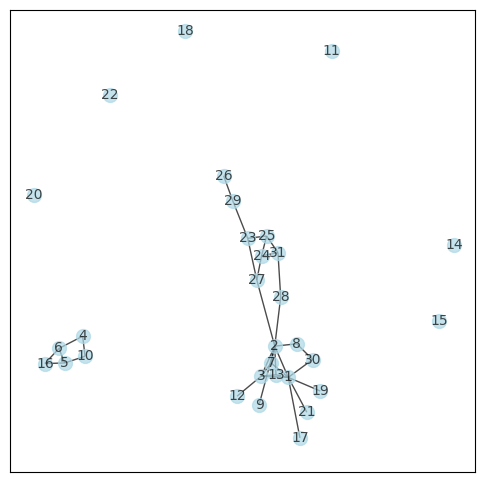

In [5]:
reduced_graph, removed_nodes = enhance_graph_by_betweenness_centrality(G)
# Draw the remaining graph
print(removed_nodes)
draw_graph(reduced_graph)
print(reduced_graph)

In [6]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Betweenness Centrality'"""
print('Similarity of Betweenness Centrality is ',sm.compare_betweenness_centrality(original_graph,reduced_graph,removed_nodes),'%')

Similarity of Betweenness Centrality is  95.03 %


In [7]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Degree Distribution'"""
print('Similarity of Degree Distribution is ',sm.compare_degree_distributions(original_graph,reduced_graph),'%')

Similarity of Degree Distribution is  93.74 %


In [8]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Eigen Vector Centrality'"""
print('Similarity of Eigen Vector Centrality is ',sm.compare_eigen_vector_centrality(original_graph,reduced_graph),'%')

Similarity of Eigen Vector Centrality is  96.12 %


In [9]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Average Path Length'"""
print('Similarity of Average Path Length is ',sm.compare_average_path_length(original_graph,reduced_graph),'%')

Similarity of Average Path Length is  88.0 %


In [10]:
"""Calculating the Jaccard similarity between the Graphs"""
print('Jaccard Similarity is ',sm.calculate_jaccard_similarity(original_graph,reduced_graph),'%')

Jaccard Similarity is  93.94 %


In [11]:
"""Calculating the Preferential Attachment Score between the Graphs"""
print('Preferential Attachment Similarity is ',sm.preferential_attachment(original_graph,reduced_graph),'%')

Preferential Attachment Similarity is  92.19 %
